In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks
from scipy.datasets import electrocardiogram


In [5]:
ecg_data = pd.read_csv("ECG_22_f.csv", sep='\t', on_bad_lines='skip')


ecg_data['spaces'] = ecg_data['0'].str.strip()
ecg_data['spaces'] = ecg_data['spaces'].str.replace(',', '.')
ecg_data['digits'] = pd.to_numeric(ecg_data['spaces'], errors='coerce') 
ecg_data['digits_int'] = ecg_data['digits'].astype(int)




df_part = ecg_data.iloc[1499:].copy()
df_part=df_part.reset_index()
df_part

,index,0,spaces,digits,digits_int
0,1499,"-112286,144976199",-112286.144976199,-112286.144976,-112286
1,1500,"-90522,3882575035",-90522.3882575035,-90522.388258,-90522
2,1501,"-81373,8351043463",-81373.8351043463,-81373.835104,-81373
3,1502,"-77019,0165060759",-77019.0165060759,-77019.016506,-77019
4,1503,"-76716,3133941889",-76716.3133941889,-76716.313394,-76716
...,...,...,...,...,...
18455,19954,"-398,999336823821",-398.999336823821,-398.999337,-398
18456,19955,"-19299,9754803106",-19299.9754803106,-19299.975480,-19299
18457,19956,"-36694,3092378378",-36694.3092378378,-36694.309238,-36694
18458,19957,"-40503,9451879263",-40503.9451879263,-40503.945188,-40503


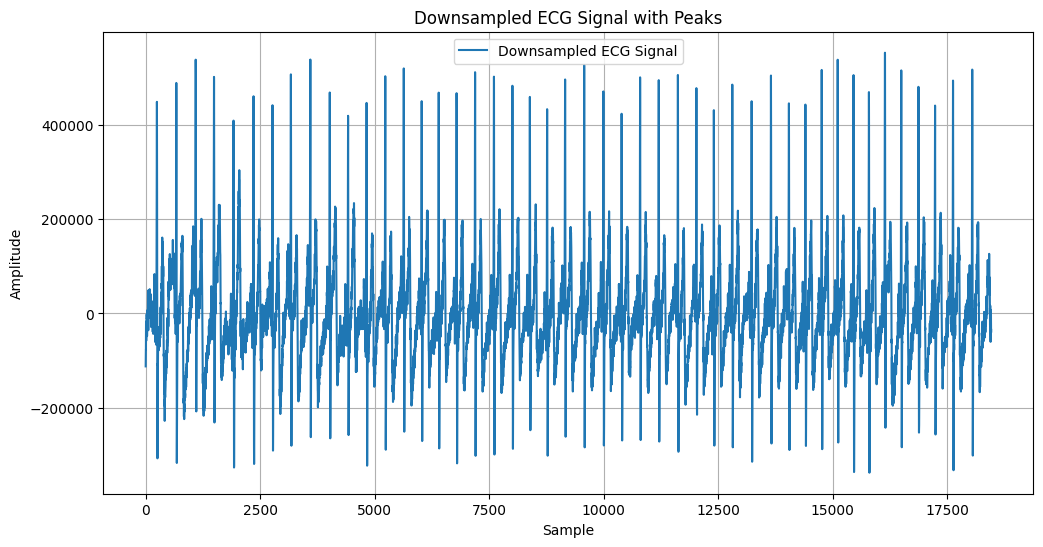

In [6]:

# plt.figure(figsize=(12, 6))
# plt.plot(df_part.index, df_part['digits_int'])
# plt.title("ECG Signal Visualization")
# plt.xlabel("Sample")
# plt.ylabel("Amplitude")
# plt.grid(True)
# plt.show()



# Downsample the data
downsample_rate = 1

df_downsampled = df_part.iloc[::downsample_rate]

# Detect peaks in the downsampled data
# peaks, _ = find_peaks(df_downsampled['digits_int'], height=0)  # Adjust height as needed

plt.figure(figsize=(12, 6))
plt.plot(df_downsampled.index, df_downsampled['digits_int'], label="Downsampled ECG Signal")
# plt.plot(df_downsampled.index[peaks], df_downsampled['digits_int'].iloc[peaks], "rx", label="Peaks")
plt.title("Downsampled ECG Signal with Peaks")

plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
#plt.gca().invert_yaxis()
plt.show()



# plt.plot(data = ecg_data.columns['digits'])


In [7]:
sampling_rate = 520

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[  245   669  1092  1492  1918  2355  2769  3170  3595  4019  4419  4823
  5231  5635  6026  6398  6788  7192  7604  8007  8388  8765  9158  9574
  9993 10391 10795 11202 11620 12024 12405 12808 13230 13652 14044 14404
 14760 15109 15455 15791 16141 16497 16872 17235 17627 18046]
[ 1918  2355  2769  3170  3595  4019  4419  4823  5231  5635  6026  6398
  6788  7192  7604  8007  8388  8765  9158  9574  9993 10391 10795 11202
 11620 12024 12405 12808 13230 13652 14044 14404 14760 15109 15455 15791
 16141 16497 16872 17235 17627 18046]


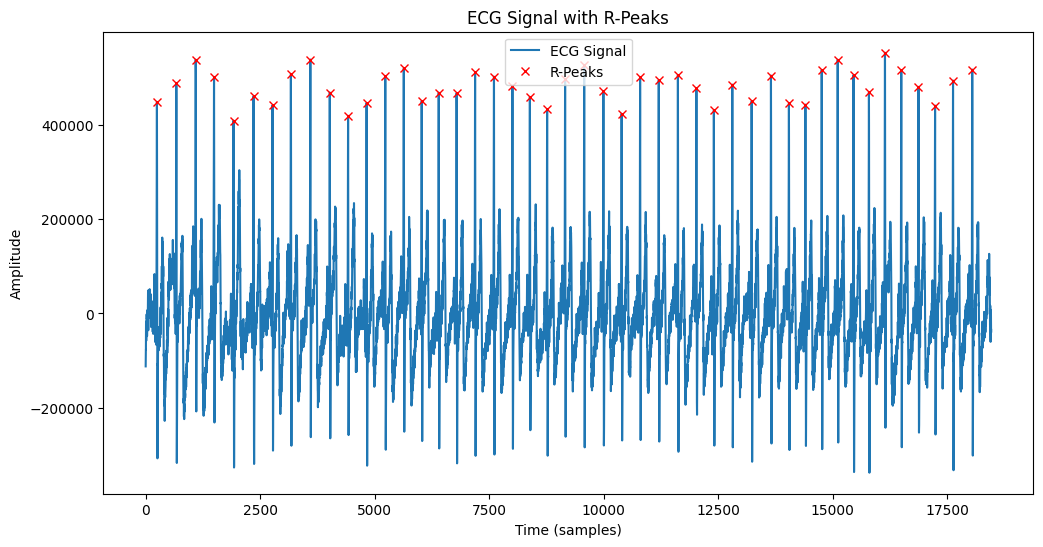

In [8]:
# Detect R-peaks


x = df_part['digits_int'].reindex()
x
# distance_between_peaks = int(sampling_rate * 0.6)  # Minimum distance between R-peaks (0.6s)
peaks, _ = find_peaks(x, height = 250000, distance = 200)  # Adjust `height` if needed
np.diff(peaks)
print(type(peaks))

# Plot signal with R-peaks

print(type(peaks))
p1 = [item for item in peaks if item >= 1500]
p2=np.array(p1)
print(peaks)
print(p2)

plt.figure(figsize=(12, 6))
plt.plot(x, label="ECG Signal")
plt.plot(peaks, x[peaks], "rx", label="R-Peaks")
plt.title("ECG Signal with R-Peaks")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()



In [9]:
# в секундах
r_peak_times = peaks / sampling_rate  
r_r_intervals = np.diff(r_peak_times)

print("R-R Intervals (1/10 of second):", r_r_intervals)


R-R Intervals (1/10 of second): [0.81538462 0.81346154 0.76923077 0.81923077 0.84038462 0.79615385
 0.77115385 0.81730769 0.81538462 0.76923077 0.77692308 0.78461538
 0.77692308 0.75192308 0.71538462 0.75       0.77692308 0.79230769
 0.775      0.73269231 0.725      0.75576923 0.8        0.80576923
 0.76538462 0.77692308 0.78269231 0.80384615 0.77692308 0.73269231
 0.775      0.81153846 0.81153846 0.75384615 0.69230769 0.68461538
 0.67115385 0.66538462 0.64615385 0.67307692 0.68461538 0.72115385
 0.69807692 0.75384615 0.80576923]


In [10]:

heart_rate = 60 / np.mean(r_r_intervals)


sdnn = np.std(r_r_intervals)  
rmssd = np.sqrt(np.mean(np.square(np.diff(r_r_intervals))))  # RMSSD

# Output statistics
print("Heart Rate (bpm):", heart_rate)
print("Стандартное отклонение (ms):", sdnn * 1000)
#print("RMSSD (ms):", rmssd * 1000)
print("Min R-R Interval (seconds):", np.min(r_r_intervals))
print("Max R-R Interval (seconds):", np.max(r_r_intervals))
print("Mean R-R Interval (seconds):", np.mean(r_r_intervals))
print("Median R-R Interval (seconds):", np.median(r_r_intervals))
print("Number of R-Peaks:", len(peaks))


Heart Rate (bpm): 78.8719734846357
Стандартное отклонение (ms): 48.19982391863215
Min R-R Interval (seconds): 0.6461538461538439
Max R-R Interval (seconds): 0.8403846153846155
Mean R-R Interval (seconds): 0.7607264957264956
Median R-R Interval (seconds): 0.7750000000000004
Number of R-Peaks: 46


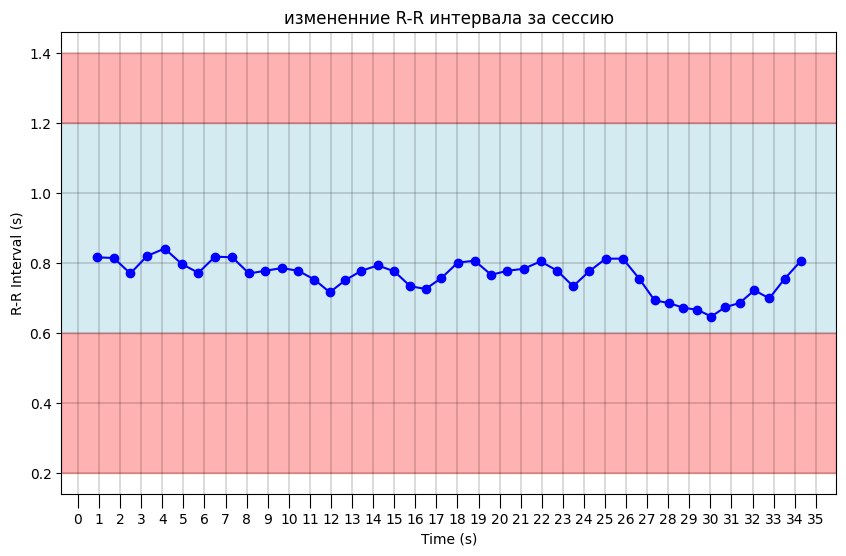

In [11]:
import matplotlib.ticker as ticker

r_r_intervals = np.diff(peaks) / sampling_rate

r_r_times = (peaks[:-1] + peaks[1:]) / 2 / sampling_rate



plt.figure(figsize=(10, 6))
plt.plot(r_r_times, r_r_intervals, marker='o', linestyle='-', color='b')
plt.axhspan(0.6, 1.2, color='lightblue', alpha=0.5)
plt.axhspan(1.2, 1.4, color='red', alpha=0.3)
plt.axhspan(0.2, 0.6, color='red', alpha=0.3)
plt.title("измененние R-R интервала за сессию")
plt.xlabel("Time (s)")
plt.ylabel("R-R Interval (s)")



ax = plt.gca()  # Получение текущей оси
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Минорные тики каждые 0.1 секунды
ax.tick_params(axis='x', which='major', length=10, color='black')  # Настройка мажорных тиков
plt.grid(which='major', color='black', linewidth=0.2)



plt.show()


In [12]:
!pip install openpyxl
data = {
    "R-R Time (s)": r_r_times,
    "R-R Interval (s)": r_r_intervals,
 
}
df = pd.DataFrame(data)


overall_stats = pd.DataFrame({
    "Heart Rate (bpm)": [heart_rate],
    "Min R-R Interval (seconds)": [np.min(r_r_intervals)],
    "Max R-R Interval (seconds)": [np.max(r_r_intervals)],
    "Mean R-R Interval (seconds)": [np.mean(r_r_intervals)],
    "Median R-R Interval (seconds)": [np.median(r_r_intervals)],
    "Number of R-Peaks": [len(peaks)]
})

# Объединяем данные
df = pd.concat([df, overall_stats], ignore_index=True)


# Запись в Excel файл
output_file = "ecg_statistics.xlsx"
df.to_excel(output_file, index=False)

print(f"Статистика сохранена в файл: {output_file}")

Статистика сохранена в файл: ecg_statistics.xlsx



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import numpy as np

def create_synchro_data_csv(filename="synchro_data.csv"):
    """
    Создает файл synchro_data.csv, где все значения равны 0, кроме одного.
    
    Parameters:
        filename (str): Имя файла для сохранения данных.
    """
    num_values = 18001  # Общее количество семплов
    values = np.zeros(num_values)  # Все значения равны 0
    values[9000] = 300000  # Пример: одно значение на позиции 9000 не равно 0
    values[2000:5000] = 600000
    values[5000:7000] = 900000
    values[10000:12000] = 300000
    values[11000] = 700000
    # Создание DataFrame и сохранение
    synchro_data = pd.DataFrame({"value": values})
    synchro_data.to_csv(filename, index=False)
    print(f"Synchro data saved to {filename}")

# Генерация файла
create_synchro_data_csv()



Synchro data saved to synchro_data.csv


In [14]:
import pandas as pd
import numpy as np

def prepare_ecg_data(ecg_values, sampling_rate):
    """
    Prepares ECG data by adding a time-based index.
    
    Parameters:
        ecg_values (list or array): ECG values without a time index.
        sampling_rate (int): Sampling frequency in Hz.
        
    Returns:
        pd.DataFrame: DataFrame with time and ECG values.
    """
    # Calculate time points based on the sampling rate
    time_points = np.arange(0, len(ecg_values)) / sampling_rate
    
    # Create a DataFrame
    ecg_data = pd.DataFrame({
        "time": time_points,
        "value": ecg_values
    })
    
    return ecg_data

# Example usage
sampling_rate = 520  # 250 Hz
ecg_datap = prepare_ecg_data(df_part['digits_int'], sampling_rate)

# Save to CSV if needed
# ecg_datap.to_csv("ecg_data.csv", index=False)
# print(ecg_datap.head())
ecg_datap
ecg_datap=ecg_datap.reset_index()
ecg_datap

,index,time,value
0,0,0.000000,-112286
1,1,0.001923,-90522
2,2,0.003846,-81373
3,3,0.005769,-77019
4,4,0.007692,-76716
...,...,...,...
18455,18455,35.490385,-398
18456,18456,35.492308,-19299
18457,18457,35.494231,-36694
18458,18458,35.496154,-40503


In [15]:
synchro_data = pd.read_csv("EMG_22_m.csv", sep='\t', on_bad_lines='skip')


synchro_data['values'] = synchro_data['0'].str.strip()
synchro_data['values'] = synchro_data['values'].str.replace(',', '.')
synchro_data['values'] = pd.to_numeric(synchro_data['values'], errors='coerce') 
synchro_data['values'] = synchro_data['values'].astype(int)




sync = synchro_data.iloc[1499:].copy()
sync = sync.reset_index()
sync



sampling_rate = 520  
sync['time'] = sync.index / sampling_rate

# # Set 'time' as the index

# sync.set_index('time', inplace=True)

sync=sync.reindex()


In [16]:




# Поиск пиков
sync_x = sync['values'].reindex()  # Ваш сигнал
synchro_events, _ = find_peaks(sync_x, height=200000, distance = 100)  # Индексы пиков

# Извлечение временных меток для найденных пиков
peak_times = sync['time'].iloc[synchro_events]

synchro_events

array([ 3313,  6274, 10335, 12895, 15005])

In [17]:
peak_times

3313      6.371154
6274     12.065385
10335    19.875000
12895    24.798077
15005    28.855769
Name: time, dtype: float64

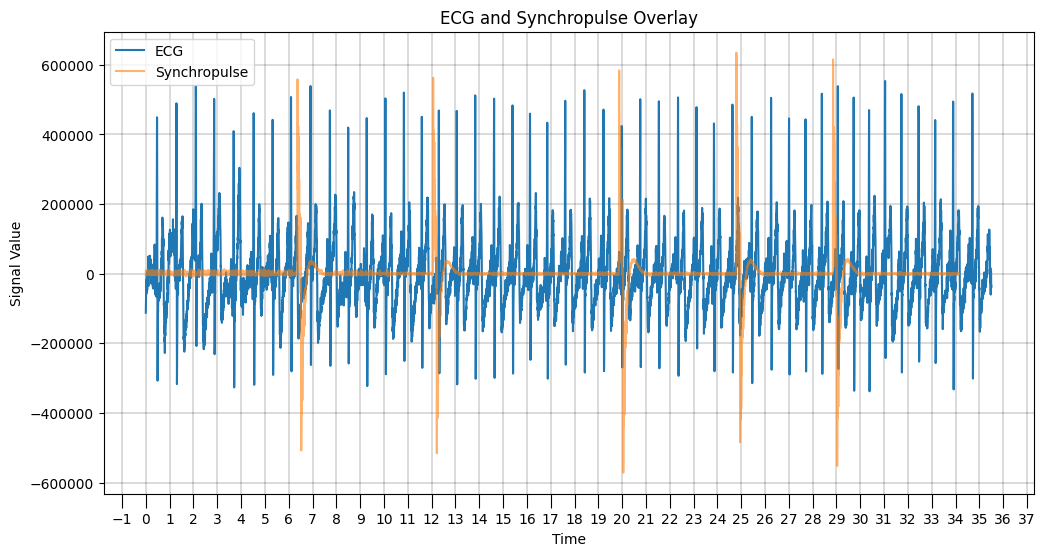

   Event  Pre_RR  Post_RR  Change
0   3313     143      282     139
1   6274     248      124    -124
2  10335     342       56    -286
3  12895      87      335     248
4  15005     245      104    -141


In [21]:



# Visualization
plt.figure(figsize=(12, 6))
plt.plot(ecg_datap['time'], ecg_datap['value'], label='ECG')
plt.plot(sync['time'], sync['values'], label='Synchropulse', alpha=0.6)



# # # Highlight synchropulse events
# for event in peak_times:
#     plt.axvline(x=event, color='red')

plt.legend()
plt.title("ECG and Synchropulse Overlay")
plt.xlabel("Time")
plt.ylabel("Signal Value")



ax = plt.gca()  # Получение текущей оси
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Минорные тики каждые 0.1 секунды
ax.tick_params(axis='x', which='major', length=10, color='black')  # Настройка мажорных тиков
plt.grid(which='major', color='black', linewidth=0.2)

plt.show()

# Analyze changes in RR intervals

# Пример: r_peaks — массив индексов пико


peaks = peaks.astype(int)
synchro_events = synchro_events.astype(int)

# Рассчитаем RR интервалы
rr_intervals = np.diff(peaks)  # Разности между соседними пиками
rr_changes = []

# Для каждого события ищем ближайшие интервалы до и после
for event in synchro_events:
    # Найти ближайший пик до события
    pre_peaks = peaks[peaks < event]
    post_peaks = peaks[peaks > event]
    
    if pre_peaks.size > 0 and post_peaks.size > 0:
        pre_rr = pre_peaks[-1]  # Последний пик до события
        post_rr = post_peaks[0]  # Первый пик после события
        
        # Рассчитать RR интервал изменения
        pre_rr_interval = event - pre_rr
        post_rr_interval = post_rr - event
        rr_changes.append({
            "Event": event,
            "Pre_RR": pre_rr_interval,
            "Post_RR": post_rr_interval,
            "Change": post_rr_interval - pre_rr_interval
        })

# Преобразовать результаты в DataFrame
rr_df = pd.DataFrame(rr_changes)
print(rr_df)



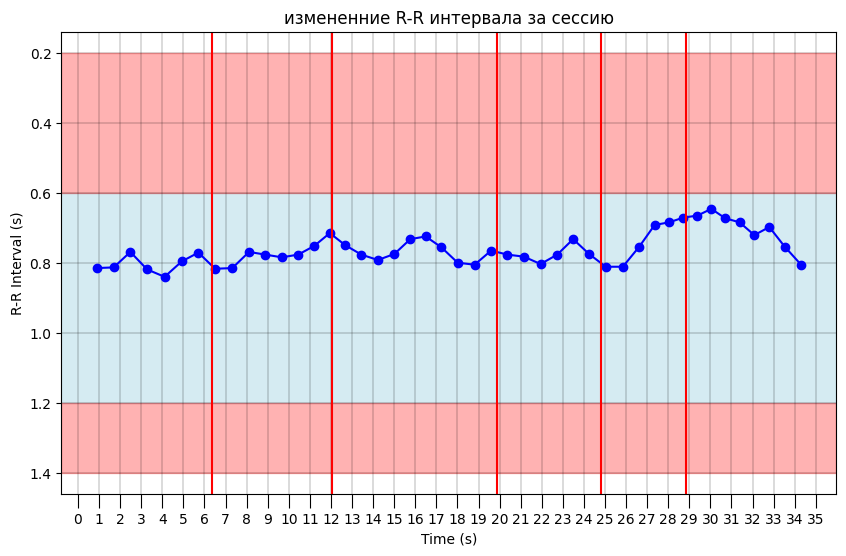

In [19]:
r_r_intervals = np.diff(peaks) / sampling_rate

r_r_times = (peaks[:-1] + peaks[1:]) / 2 / sampling_rate



plt.figure(figsize=(10, 6))
plt.plot(r_r_times, r_r_intervals, marker='o', linestyle='-', color='b')
plt.axhspan(0.6, 1.2, color='lightblue', alpha=0.5)
plt.axhspan(1.2, 1.4, color='red', alpha=0.3)
plt.axhspan(0.2, 0.6, color='red', alpha=0.3)
plt.title("измененние R-R интервала за сессию")
plt.xlabel("Time (s)")
plt.ylabel("R-R Interval (s)")
plt.gca().invert_yaxis()
for event in peak_times:
    plt.axvline(x=event, color='red')


ax = plt.gca()  # Получение текущей оси
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Минорные тики каждые 0.1 секунды
ax.tick_params(axis='x', which='major', length=10, color='black')  # Настройка мажорных тиков
plt.grid(which='major', color='black', linewidth=0.2)



plt.show()


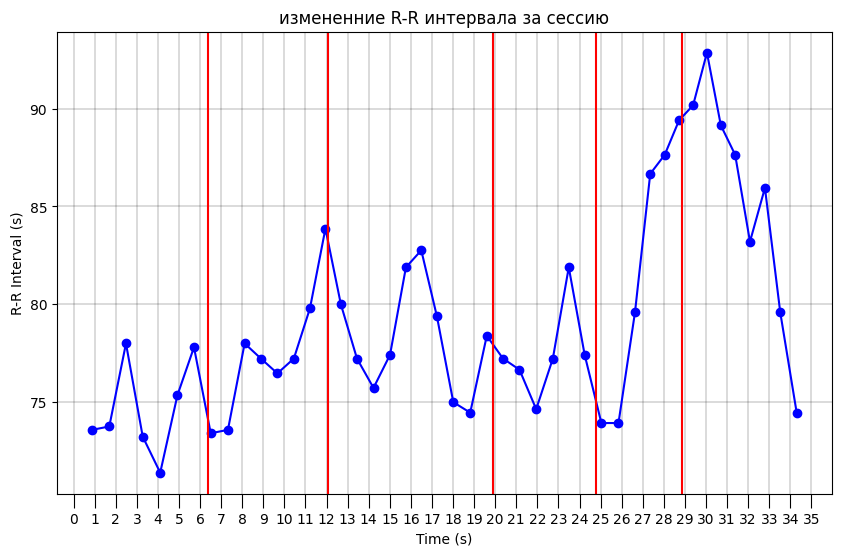

In [20]:
r_r_intervals = np.diff(peaks) / sampling_rate

r_r_times = (peaks[:-1] + peaks[1:]) / 2 / sampling_rate



plt.figure(figsize=(10, 6))
plt.plot(r_r_times, 60/r_r_intervals, marker='o', linestyle='-', color='b')
# plt.axhspan(0.6, 1.2, color='lightblue', alpha=0.5)
# plt.axhspan(1.2, 1.4, color='red', alpha=0.3)
# plt.axhspan(0.2, 0.6, color='red', alpha=0.3)
plt.title("измененние R-R интервала за сессию")
plt.xlabel("Time (s)")
plt.ylabel("R-R Interval (s)")

for event in peak_times:
    plt.axvline(x=event, color='red')


ax = plt.gca()  # Получение текущей оси
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Минорные тики каждые 0.1 секунды
ax.tick_params(axis='x', which='major', length=10, color='black')  # Настройка мажорных тиков
plt.grid(which='major', color='black', linewidth=0.2)



plt.show()
